--------------------- End of loading ------------------------------
                     |Loss:  2451
Train on 6121 samples, validate on 2041 samples
Epoch 1/30
6121/6121 [==============================] - 25s 4ms/step - loss: 0.4434 - acc: 0.0033 - val_loss: 0.1644 - val_acc: 0.0064
Epoch 2/30
6121/6121 [==============================] - 20s 3ms/step - loss: 0.1599 - acc: 0.0041 - val_loss: 0.1130 - val_acc: 0.0064
Epoch 3/30
6121/6121 [==============================] - 19s 3ms/step - loss: 0.1313 - acc: 0.0041 - val_loss: 0.1051 - val_acc: 0.0064
Epoch 4/30
6121/6121 [==============================] - 21s 3ms/step - loss: 0.1204 - acc: 0.0044 - val_loss: 0.1078 - val_acc: 0.0064
Epoch 5/30
6121/6121 [==============================] - 24s 4ms/step - loss: 0.1146 - acc: 0.0041 - val_loss: 0.0900 - val_acc: 0.0064
Epoch 6/30
6121/6121 [==============================] - 20s 3ms/step - loss: 0.1101 - acc: 0.0041 - val_loss: 0.1196 - val_acc: 0.0064
Epoch 7/30
6121/6121 [==================

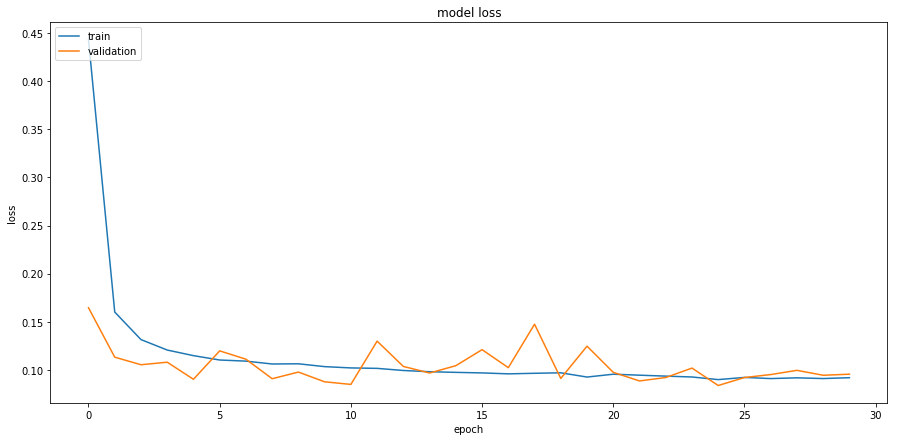

RMSE_znorm            0.086386
bias_znorm            0.083427
std_znorm             0.083427
RMSE                  0.108529
|znorm| > 0.15 (%)    6.764706
|znorm| > 3std (%)    1.470588
Name: Redshift, dtype: float64


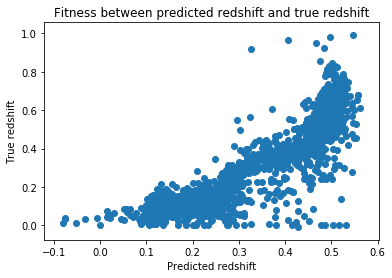

In [6]:
from keras.layers import Flatten, Conv3D, Activation , Dense, AveragePooling3D, MaxPooling3D , Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from utils import *
from keras.utils import plot_model

model = Sequential()
#inputs = Input(shape=(32,32,5))
model.add(Flatten(input_shape = (32,32,5)))
model = model_nn(model, 64, 8, dropout=0.3, batch_normalization=True, activation='relu', neurons_decay=0, starting_power=1, l2=10**-5, compile_model=True, trainable=True)
model.compile(loss=rmse_loss_keras, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


batch_size = 10#128
data = '../data/csvs/galaxies/all1_.csv';
dir_img = '../data/images/galaxies1/all/*.npy'

size_all = None#1000
X_Train, Y_Train, X_Test, Y_Test, X_Valid, Y_Valid = get_train_test_valid_data_galaxy(data,dir_img,test_size=0.4, valid_size = 0.5, size_all = size_all)

history = model.fit(X_Train, Y_Train, validation_data=(X_Valid, Y_Valid), epochs=30, batch_size=batch_size, verbose=1)

save_model(model, './model_mlp.json')

plot_history(history);

predict = model.predict(X_Test, batch_size=batch_size).reshape(-1)
result = compute_metrics(Y_Test, predict, 'Redshift')     
print(result)

plot_result(predict, Y_Test, x_name = "Predicted redshift", y_name = "True redshift")

In [3]:
32 neurones dans la couche cachée et 5 couche cachées
RMSE_znorm            0.083888
bias_znorm            0.082027
std_znorm             0.082027
RMSE                  0.122098
|znorm| > 0.15 (%)    5.833333
|znorm| > 3std (%)    1.568627
Name: Redshift, dtype: float64

64 neurones dans la couche cachée et 5 couche cachées
RMSE_znorm            0.081285
bias_znorm            0.081261
std_znorm             0.081261
RMSE                  0.110953
|znorm| > 0.15 (%)    5.784314
|znorm| > 3std (%)    1.470588
Name: Redshift, dtype: float64

SyntaxError: invalid syntax (<ipython-input-3-46e4cdfea559>, line 1)

In [8]:
result.head

<bound method NDFrame.head of RMSE_znorm            0.086386
bias_znorm            0.083427
std_znorm             0.083427
RMSE                  0.108529
|znorm| > 0.15 (%)    6.764706
|znorm| > 3std (%)    1.470588
Name: Redshift, dtype: float64>